In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
df = pd.read_csv('amazon_reviews.csv')
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [3]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')
from nltk.tokenize import word_tokenize

import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [5]:
df = df[df['reviewerName'].notnull()]
df = df[df['reviewText'].notnull()]

In [6]:
df.isnull().sum()


Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

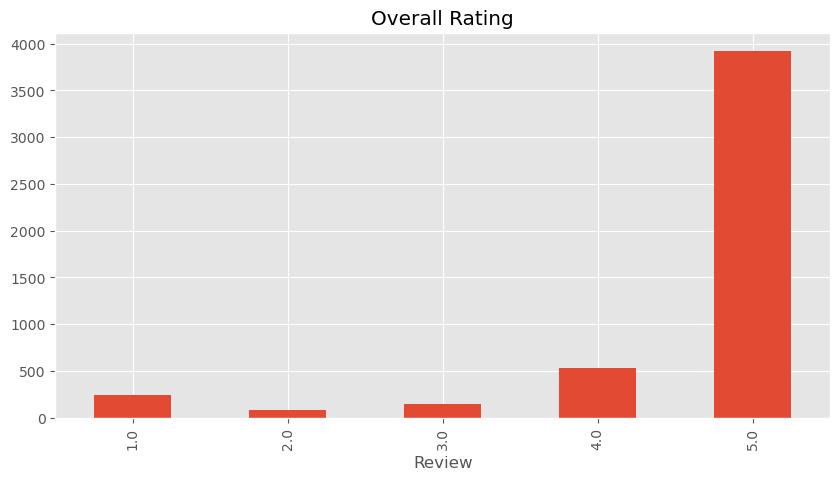

In [7]:
ad = df['overall'].value_counts().sort_index().plot(kind = 'bar', title = "Overall Rating", figsize = (10,5))
ad.set_xlabel("Review")
plt.show()

<Axes: title={'center': 'Avg. Rating'}, xlabel='score_average_rating'>

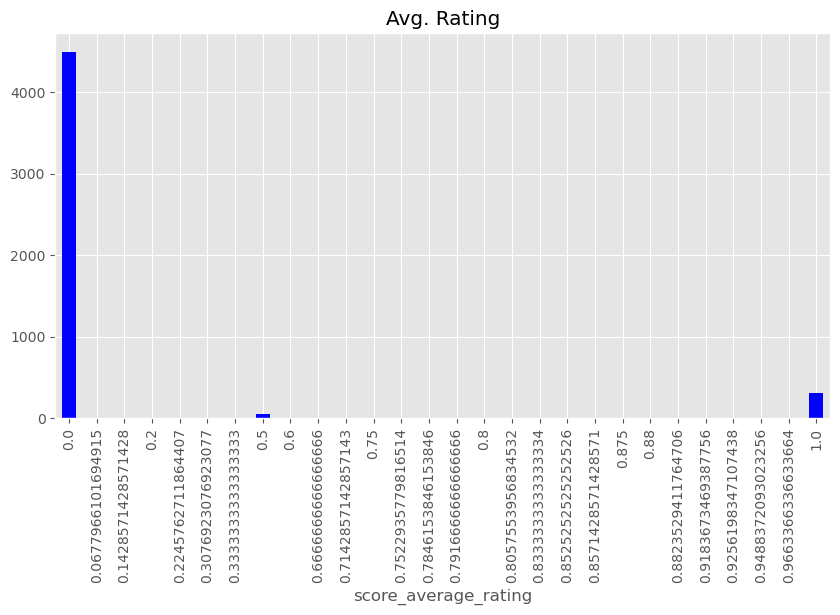

In [8]:
df['score_average_rating'].value_counts().sort_index().plot(kind = 'bar', title = "Avg. Rating", figsize = (10,5), color = 'blue')

<Axes: title={'center': 'Number of votes given to the evaluation'}, xlabel='total_vote'>

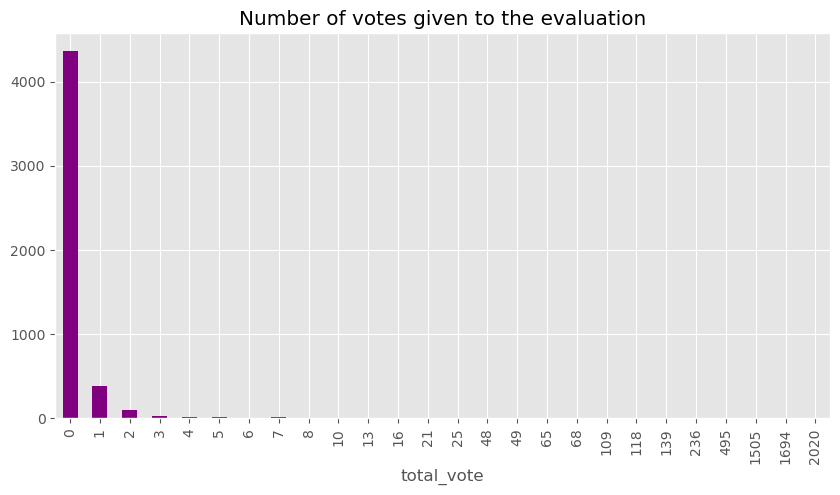

In [9]:
df['total_vote'].value_counts().sort_index().plot(kind = 'bar', title = 'Number of votes given to the evaluation', figsize = (10,5), color = 'purple')

In [10]:
for i in df:
    if i == 'reviewText':
        df[i] = df[i].str.lower()
        df[i] = df[i].str.replace('[^\w\s]', '')
        df[i] = df[i].str.replace('\d', '')
        
df
    

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\acer\AppData\Local\Temp\ipykernel_20272\3932362906.py:4: SyntaxWarning: invalid escape sequence '\w'
  df[i] = df[i].str.replace('[^\w\s]', '')
C:\Users\acer\AppData\Local\Temp\ipykernel_20272\3932362906.py:5: SyntaxWarning: invalid escape sequence '\d'
  df[i] = df[i].str.replace('\d', '')


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk 16gb class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,great card that is very fast and reliable. it ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [11]:
old_name = 'Unnamed: 0'
new_name = 'ID'

df = df.rename(columns = {old_name:new_name})
df.head()

,ID,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [12]:
df

,ID,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk 16gb class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,great card that is very fast and reliable. it ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [15]:
df['reviewText'][10]

'i like this sd card because it can take music video downloads, personal videos, files,docs, and multimedia images with a fast transfer rate of class 10 speed. it can take games with large files very easily and still have enough space for apps. it&#34;s great for video cameras and camcorders with the supplied adapter. fits very easily into smartphones and tablets sd card slots. i recommend this 32gb sd card to everyone.'

In [16]:
sia.polarity_scores(df['reviewText'][10])

{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9258}

In [17]:
df.columns

Index(['ID', 'reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [18]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['reviewText']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4913 [00:00<?, ?it/s]

In [19]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.075,0.925,0.000,-0.2960
2,0.077,0.923,0.000,-0.3089
3,0.000,0.909,0.091,0.7081
4,0.038,0.835,0.127,0.7087
5,0.000,1.000,0.000,0.0000
...,...,...,...,...
4910,0.091,0.817,0.092,0.0018
4911,0.000,0.939,0.061,0.1761
4912,0.000,0.828,0.172,0.8588
4913,0.000,0.802,0.198,0.4939


In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'ID'})
vaders = vaders.merge(df, how = 'left')

In [21]:
vaders

,ID,neg,neu,pos,compound,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.000,-0.2960,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.000,-0.3089,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
2,3,0.000,0.909,0.091,0.7081,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
3,4,0.038,0.835,0.127,0.7087,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
4,5,0.000,1.000,0.000,0.0000,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,4910,0.091,0.817,0.092,0.0018,"ZM ""J""",1.0,i bought this sandisk 16gb class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4909,4911,0.000,0.939,0.061,0.1761,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4910,4912,0.000,0.828,0.172,0.8588,Z S Liske,5.0,great card that is very fast and reliable. it ...,2014-03-31,252,0,0,0,0,0.0,0.0
4911,4913,0.000,0.802,0.198,0.4939,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


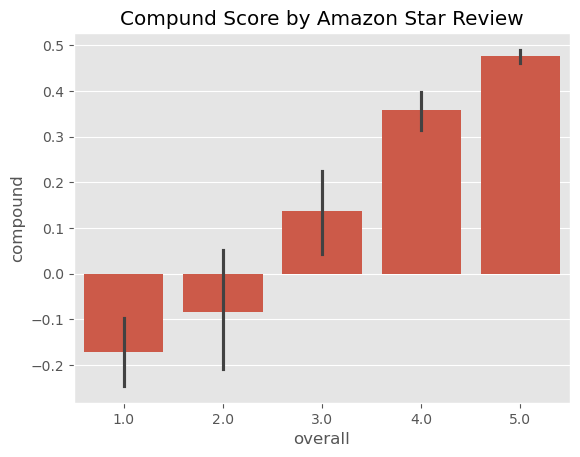

In [22]:
gph = sns.barplot(data = vaders, x = 'overall', y = 'compound')
gph.set_title('Compund Score by Amazon Star Review')
plt.show()

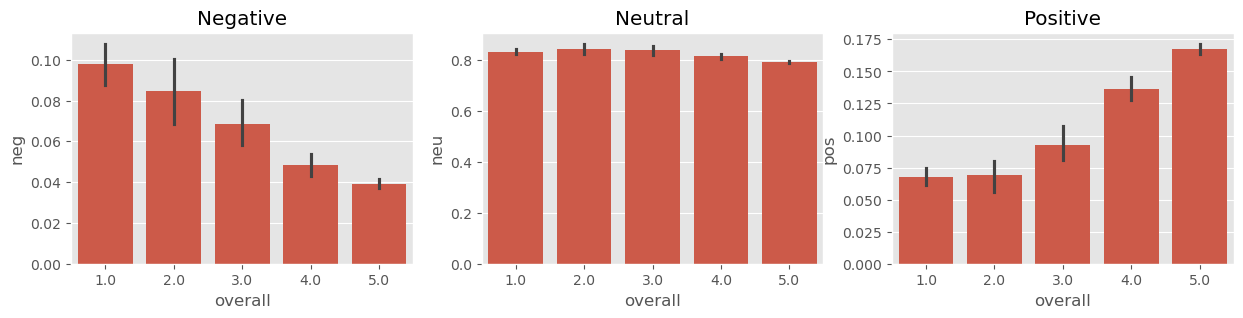

In [23]:
fig, ax = plt.subplots(1,3, figsize = (15,3))
sns.barplot(data = vaders, x = 'overall', y = 'neg', ax = ax[0])
sns.barplot(data = vaders, x = 'overall', y = 'neu', ax = ax[1])
sns.barplot(data = vaders, x = 'overall', y = 'pos', ax = ax[2])
ax[0].set_title('Negative')
ax[1].set_title('Neutral')
ax[2].set_title('Positive')
plt.show()

In [24]:
from scipy.stats import norm

# Function to calculate Wilson Lower Bound
def wilson_lower_bound(pos, n, confidence=0.95):
    """
    pos: Number of positive votes
    n: Total number of votes
    confidence: Confidence level (default is 95%)
    """
    if n == 0:
        return 0
    z = norm.ppf(1 - (1 - confidence) / 2)
    phat = pos / n
    return (phat + z**2 / (2 * n) - z * ((phat * (1 - phat) + z**2 / (4 * n)) / n)**0.5) / (1 + z**2 / n)

# Apply Wilson Lower Bound to rank reviews
df['wilson_lower_bound'] = df.apply(lambda x: wilson_lower_bound(x['helpful_yes'], x['total_vote']), axis=1)

# Sort reviews by Wilson Lower Bound score
df_sorted_by_wilson = df.sort_values(by='wilson_lower_bound', ascending=False)

# Display the top-ranked reviews
df_sorted_by_wilson.head()

,ID,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,2031,"Hyoun Kim ""Faluzure""",5.0,[[ update - 6/19/2014 ]]so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro-sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
4212,4212,SkincareCEO,1.0,note: please read the last update (scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139
317,317,"Amazon Customer ""Kelly""",1.0,"if your card gets hot enough to be painful, it...",2012-02-09,1033,422,73,495,349,0.852525,0.818577
4672,4672,Twister,5.0,sandisk announcement of the first 128gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109


In [25]:
#Roberta Pretrained Model

#This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model)

In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [27]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [28]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

In [29]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberat_pos' : scores[2]
    }
    return scores_dict
polarity_scores_roberta("This is too good")

{'roberta_neg': 0.0028646875,
 'roberta_neu': 0.010610016,
 'roberat_pos': 0.9865253}

In [73]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['reviewText']
        myid = row['ID']
        vader_results = sia.polarity_scores(text)
        vader_results_rename = {}
        for key, value in vader_results.items():
            vader_results_rename[f"vader_{key}"] = value
        roberta_results = polarity_scores_roberta(text)
        combine = {**vader_results, **roberta_results}
        res[myid] = combine
    except Exception as e:
        print(f"Error processing ID {myid}: {e}")

  0%|          | 0/4913 [00:00<?, ?it/s]

Error processing ID 76: The expanded size of the tensor (1092) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1092].  Tensor sizes: [1, 514]
Error processing ID 123: The expanded size of the tensor (1183) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1183].  Tensor sizes: [1, 514]
Error processing ID 722: The expanded size of the tensor (757) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 757].  Tensor sizes: [1, 514]
Error processing ID 1380: The expanded size of the tensor (587) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 587].  Tensor sizes: [1, 514]
Error processing ID 2031: The expanded size of the tensor (1430) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1430].  Tensor sizes: [1, 514]
Error processing ID 2799: The expanded size of the tensor (637) must match the existing size (514) at non-si

In [74]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns = {'index':'ID'})
results = results.merge(df, how = 'left')

In [75]:
results.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberat_pos,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.000,-0.2960,0.006695,0.084906,0.908400,0mie,5.0,"purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.000,-0.3089,0.382923,0.465266,0.151811,1K3,4.0,it works as expected. i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
2,3,0.000,0.909,0.091,0.7081,0.002420,0.018434,0.979146,1m2,5.0,this think has worked out great.had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
3,4,0.038,0.835,0.127,0.7087,0.003562,0.060882,0.935556,2&amp;1/2Men,5.0,"bought it with retail packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
4,5,0.000,1.000,0.000,0.0000,0.106499,0.518373,0.375128,2Cents!,5.0,it's mini storage. it doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [76]:
#Comparing the Models Vader & Roberta

In [77]:
results.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberat_pos', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

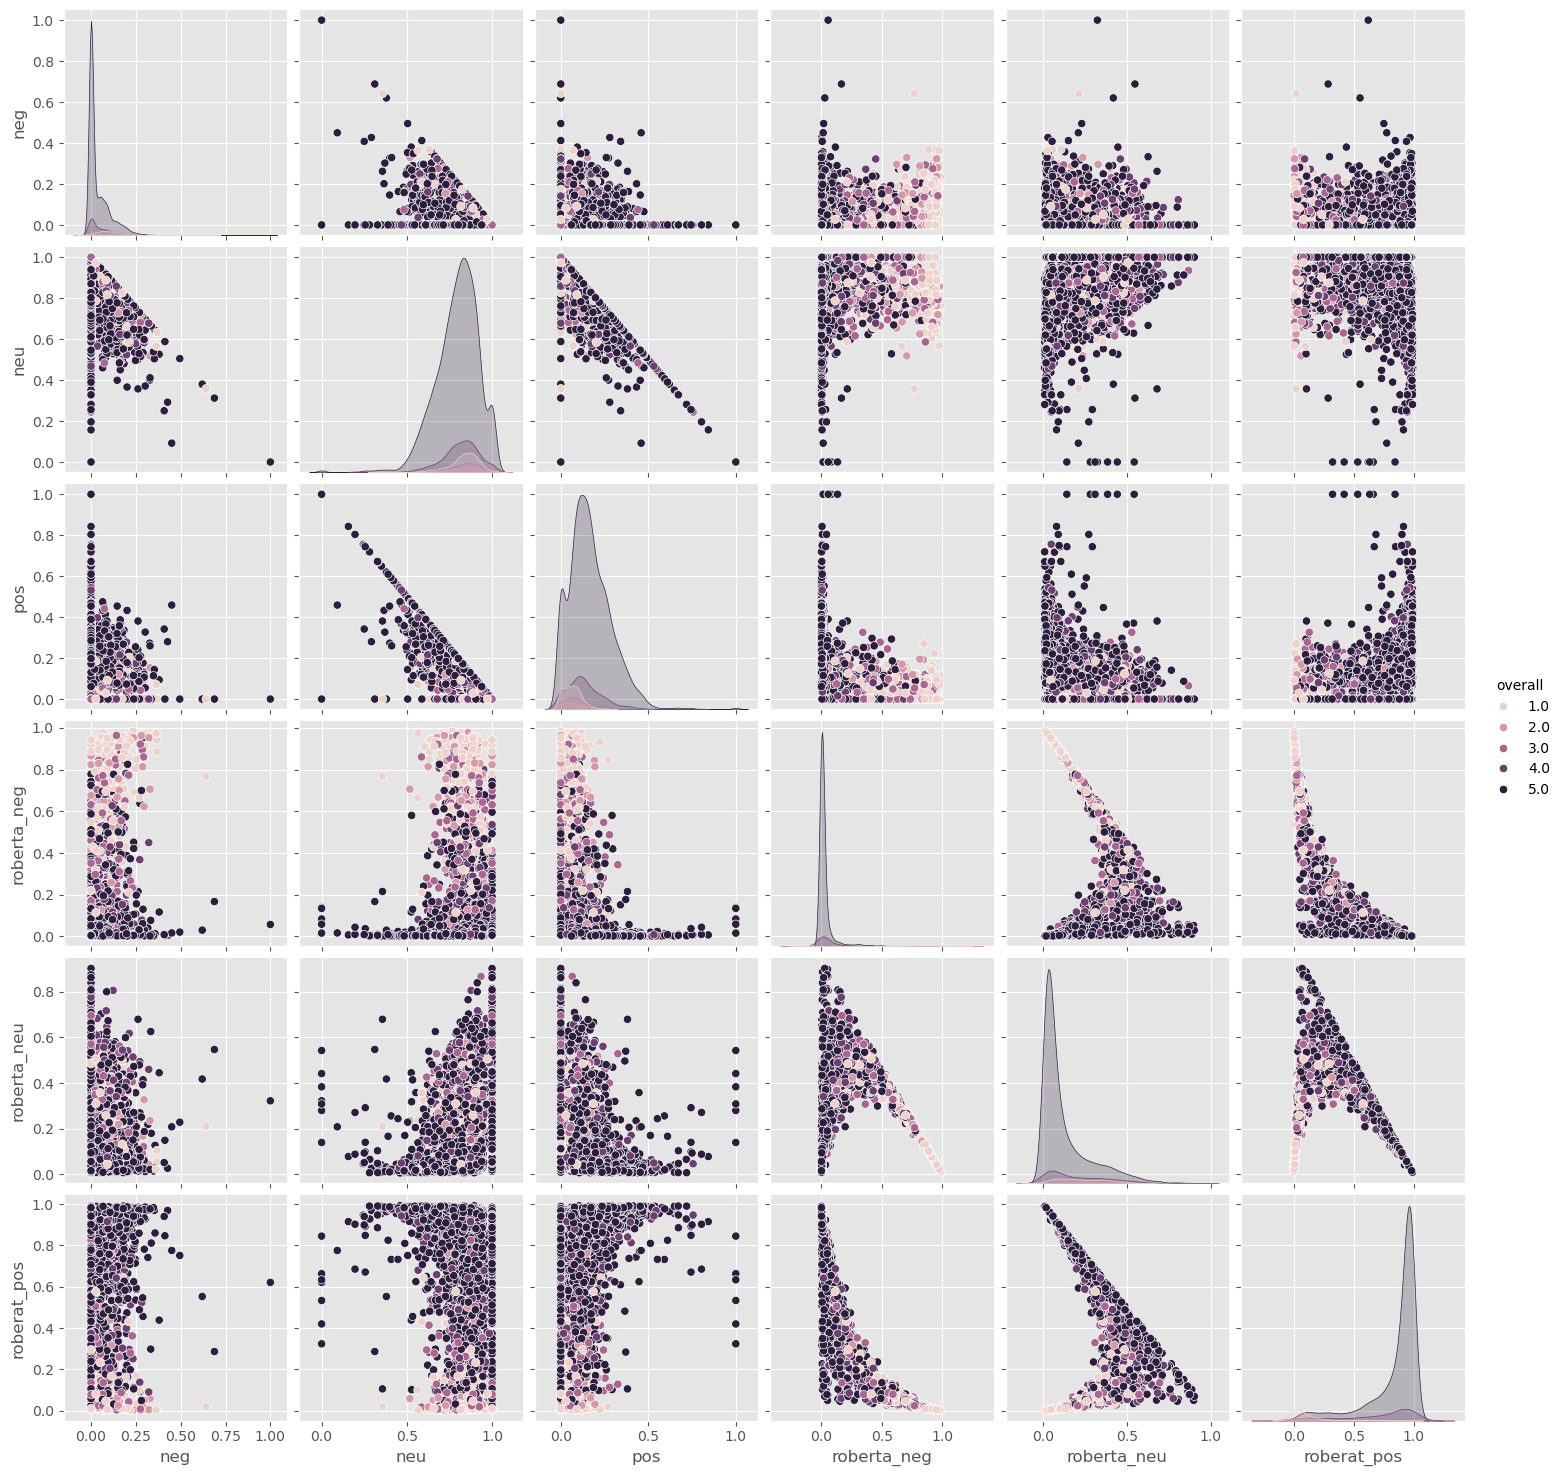

In [78]:
sns.pairplot(data = results, vars = ['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberat_pos'], hue = 'overall')
plt.show()

In [79]:
results.query('overall == 1').sort_values('roberat_pos', ascending = False)

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberat_pos,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4076,4091,0.000,0.822,0.178,0.6369,0.010575,0.088042,0.901383,Scott,1.0,i returned to order a 11.6 laptop so i could h...,2014-08-05,125,0,2,2,-2,0.0,0.000000
1884,1890,0.109,0.792,0.099,-0.1548,0.015830,0.086304,0.897866,gt,1.0,"i have zero complaints, this card does exactly...",2012-04-11,971,0,0,0,0,0.0,0.000000
3383,3395,0.000,0.910,0.090,0.8555,0.061596,0.207292,0.731112,Neacsu Teodor,1.0,i can say that sandisk is one of the best comp...,2014-06-14,177,0,0,0,0,0.0,0.000000
1785,1791,0.047,0.754,0.199,0.9283,0.078627,0.200886,0.720487,G. Evans,1.0,i didn't even have this card installed in my ...,2013-03-23,625,4,1,5,3,0.8,0.375535
173,177,0.000,0.863,0.137,0.8286,0.067670,0.237007,0.695323,"Amazon Customer ""Christian""",1.0,"i routinely use sdxc cards up to 128gb, and th...",2013-05-22,565,0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,2385,0.296,0.704,0.000,-0.8777,0.971834,0.025117,0.003049,Joeyd1275,1.0,"im so upset right now it just died , turned on...",2012-11-20,748,0,0,0,0,0.0,0.000000
4829,4849,0.363,0.566,0.071,-0.8687,0.973953,0.023064,0.002983,W. Paul Lothary,1.0,died within 6 months! stopped being able to re...,2014-01-28,314,2,0,2,2,1.0,0.342380
2782,2789,0.219,0.781,0.000,-0.4215,0.961129,0.035940,0.002931,Lateef,1.0,"trash quality, broke and corrupted my data on ...",2014-01-07,335,0,0,0,0,0.0,0.000000
928,933,0.069,0.815,0.116,0.7569,0.974867,0.022398,0.002735,Chris Belardinelli,1.0,i've only had this memory card for 3.5 weeks a...,2013-05-02,585,1,1,2,0,0.5,0.094531


In [80]:
#Examples

In [81]:
results.query('overall == 1').sort_values('roberat_pos', ascending = False)['reviewText'].values[0]

'i returned to order a 11.6 laptop so i could have full operations than having a notebook. i am sure this is good quality as i have purchased san disk numerous times.'

In [82]:
results.query('overall == 5').sort_values('roberta_neg', ascending = False)['reviewText'].values[0]

'works! and why should i write more..... damn it! eleven more words... finally am done with this, crap!! three more words??'

In [83]:
results.query('overall == 5').sort_values('pos', ascending = False)['reviewText'].values[0]

'super'

In [84]:
results.query('overall == 1').sort_values('neg', ascending = False)['reviewText'].values[0]

'failed after a year!'

In [85]:
results.query('overall == 3').sort_values('pos', ascending = False)['reviewText'].values[0]

'good price. works as expected. nothing much more to say abt a microsd card honestly. the frustration free packaging is really good. definitely better than the retail packaging.'

In [86]:
results.query('overall == 2').sort_values('pos', ascending = False)['reviewText'].values[0]

'tried this with its adapter on dslr camera and got some errors at times while trying to save data to card.  it is ok for other uses like computer external data.'

In [87]:
results.query('overall == 4').sort_values('pos', ascending = False)['reviewText'].values[0]

'very nice'